## Importing Libraries

In [180]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import warnings

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree 

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, roc_auc_score 

In [181]:
warnings.filterwarnings("ignore")

## Loading Datasets

In [182]:
mdf =pd.read_csv('movies.dat', sep='::',engine='python',encoding='latin-1',names=['MovieID','Title','Genres'])

mdf

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [183]:
udf =pd.read_csv('users.dat', sep='::',engine='python',encoding='latin-1',names=['UserID','Gender','Age','Occupation','Zip-code'])

udf

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [184]:
rdf =pd.read_csv('ratings.dat', sep='::',engine='python',encoding='latin-1',names=['UserID','MovieID','Rating','Timestamp'])

rdf

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


## Merging Datasets

In [185]:
# merging movie data with respect to ratings data

rdf = mdf.merge(rdf,on='MovieID',how='inner')

rdf

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [186]:
# merging the ratings data with respect to users data and creating new data set

df = rdf.merge(udf,on='UserID',how='inner')

df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


## Data Cleaning

In [187]:
df.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


## EDA

In [193]:
df['Genres'].value_counts(ascending=False)

action_movies = df[df['Genres'].str.contains("Action", na = False)]

print("\n RETRIVING ALL THE MOVIES THAT ARE OF GENRE ACTION \n\n")

action_movies


 RETRIVING ALL THE MOVIES THAT ARE OF GENRE ACTION 




,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
23,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1,3,978302268,F,1,10,48067
27,1287,Ben-Hur (1959),Action|Adventure|Drama,1,5,978302039,F,1,10,48067
36,2028,Saving Private Ryan (1998),Action|Drama|War,1,5,978301619,F,1,10,48067
43,2692,Run Lola Run (Lola rennt) (1998),Action|Crime|Romance,1,4,978301570,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000186,2881,Double Jeopardy (1999),Action|Thriller,5727,3,958490981,M,25,4,92843
1000191,3113,End of Days (1999),Action|Thriller,5727,3,958490981,M,25,4,92843
1000197,3316,Reindeer Games (2000),Action|Thriller,5727,3,958490699,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [194]:
movies_df = df[['Title','Genres', 'Rating']]

movies = movies_df.sort_values('Rating', ascending = False)

top_movies = movies.head(10)

print("\n TOP 10 MOVIES WITH HIGHEST RATINGS: \n\n")

top_movies


 TOP 10 MOVIES WITH HIGHEST RATINGS: 




,Title,Genres,Rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [195]:
gender_map = {'M': 0, 'F': 1}

df['Gender'] = df['Gender'].map(gender_map)

df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,0,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,0,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,0,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,0,25,4,92843


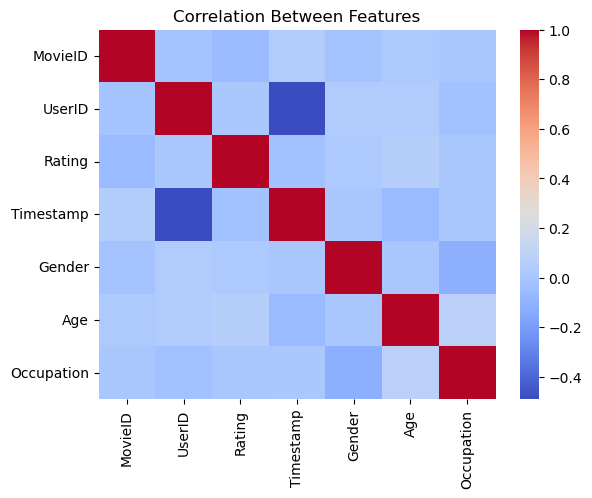

In [196]:
sns.heatmap(df.corr(), cmap='coolwarm')

plt.title('Correlation Between Features')

plt.show()

## Dropping irrelevant columns

In [197]:
columns_drop = ["Title","Genres","UserID", "Timestamp", "Zip-code"]

df.drop(columns=columns_drop, inplace=True)

df

,MovieID,Rating,Gender,Age,Occupation
0,1,5,1,1,10
1,48,5,1,1,10
2,150,5,1,1,10
3,260,4,1,1,10
4,527,5,1,1,10
...,...,...,...,...,...
1000204,3513,4,0,25,4
1000205,3535,2,0,25,4
1000206,3536,5,0,25,4
1000207,3555,3,0,25,4


## Training and Testing Model

In [198]:
X = df[["MovieID", "Age", "Occupation"]]  # Features (independent variable)

y = df['Rating']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
clf = DecisionTreeClassifier() 

clf = clf.fit(X_train,y_train)

In [200]:
y_pred = clf.predict(X_test)

y_pred

array([4, 4, 3, ..., 3, 3, 5], dtype=int64)

## Model Evaluation

In [201]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 35.25%


In [202]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")

print(conf_matrix)

Confusion Matrix:
[[ 2352  2161  3442  2646   705]
 [ 2302  3455  7352  6700  1659]
 [ 2963  5806 16979 20402  5932]
 [ 2109  4685 17972 31893 13307]
 [  812  1698  7700 19181 15829]]


In [203]:
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")

print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.21      0.22     11306
           2       0.19      0.16      0.18     21468
           3       0.32      0.33      0.32     52082
           4       0.39      0.46      0.42     69966
           5       0.42      0.35      0.38     45220

    accuracy                           0.35    200042
   macro avg       0.31      0.30      0.30    200042
weighted avg       0.35      0.35      0.35    200042

